In [ ]:
# Veri işleme ve görselleştirme kütüphaneleri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi modülleri
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# CSV dosyasını oku
df = pd.read_csv("diabetes_data_upload.csv")  # Not: dosya adın farklıysa burayı düzelt
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
# Veri setinin genel bilgilerine bakalım
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
# Eksik veri sayısını görelim
df.isnull().sum()


,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
# Yes/No gibi string ifadeleri sayısala çeviriyoruz
df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({'Male': 1, 'Female': 0})
df = df.replace({'Positive': 1, 'Negative': 0})
df.head()


<ipython-input-20-2c436443f233>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Positive': 1, 'Negative': 0})


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
# Hedef sütun: class (Diyabet var mı yok mu?)
X = df.drop("class", axis=1)  # Tüm sütunlardan 'class' hariç olanlar X olacak
y = df["class"]               # Sadece 'class' sütunu hedef değişken

# İlk 5 satırı inceleyelim
X.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
# Veriyi %80 eğitim, %20 test olarak bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Şekillerini görelim
print("Eğitim veri boyutu:", X_train.shape)
print("Test veri boyutu:", X_test.shape)


Eğitim veri boyutu: (416, 16)
Test veri boyutu: (104, 16)


In [ ]:
# Lojistik regresyon modelini oluştur
model = LogisticRegression(max_iter=100)

# Modeli eğit
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Test verisini kullanarak tahmin yapalım
y_pred = model.predict(X_test)

# İlk 10 tahmine bakalım
print("Tahminler:", y_pred[:10])
print("Gerçek değerler:", y_test.values[:10])


Tahminler: [0 1 1 1 1 1 1 0 1 0]
Gerçek değerler: [0 1 1 1 1 1 1 0 1 0]


In [ ]:
# Doğruluk oranı
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk (Accuracy):", accuracy)

# Karışıklık matrisi
print("\nKarışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))

# Ayrıntılı sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Doğruluk (Accuracy): 0.9230769230769231

Karışıklık Matrisi:
[[28  5]
 [ 3 68]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



In [ ]:
# Özellik önemini görelim
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)


               Feature  Coefficient
3           Polydipsia     2.634848
2             Polyuria     2.578316
10        Irritability     1.470152
7       Genital thrush     1.336485
12     partial paresis     1.014970
4   sudden weight loss     0.903378
8      visual blurring     0.774093
5             weakness     0.531706
6           Polyphagia     0.455958
0                  Age    -0.036840
14            Alopecia    -0.158542
13    muscle stiffness    -0.176877
15             Obesity    -0.186113
11     delayed healing    -0.563419
9              Itching    -1.203638
1               Gender    -2.385263


<ipython-input-27-4341447132f9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=df_coef_sorted, palette="coolwarm")


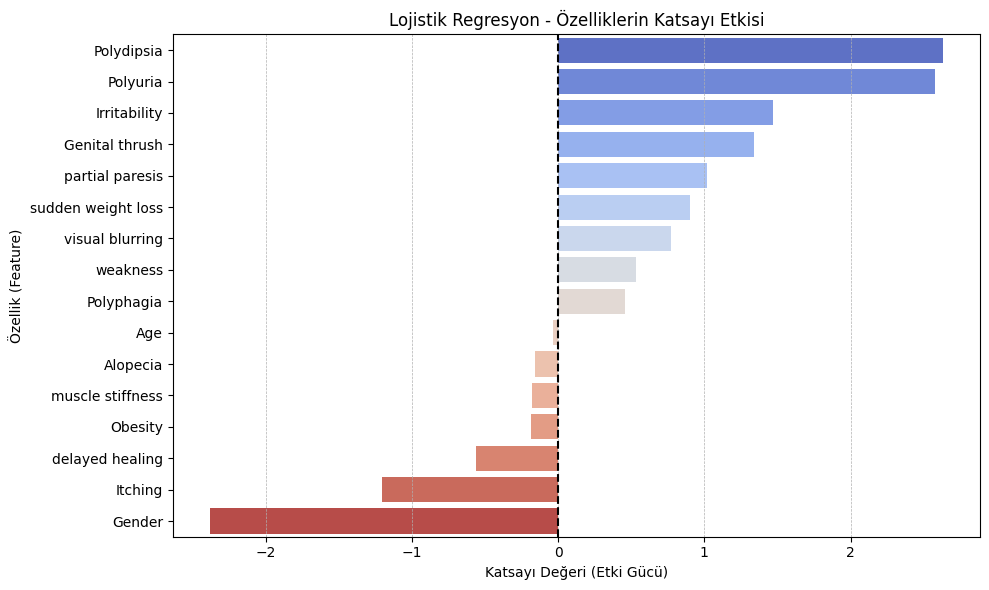

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Özellikler ve katsayılar (manuel girildi)
data = {
    "Feature": [
        "Polydipsia", "Polyuria", "Irritability", "Genital thrush", "partial paresis", "sudden weight loss",
        "visual blurring", "weakness", "Polyphagia", "Age", "Alopecia", "muscle stiffness", "Obesity",
        "delayed healing", "Itching", "Gender"
    ],
    "Coefficient": [
        2.634848, 2.578316, 1.470152, 1.336485, 1.014970, 0.903378,
        0.774093, 0.531706, 0.455958, -0.036840, -0.158542, -0.176877, -0.186113,
        -0.563419, -1.203638, -2.385263
    ]
}

# DataFrame oluştur ve sıralama yap
df_coef = pd.DataFrame(data)
df_coef_sorted = df_coef.sort_values(by="Coefficient", ascending=False)

# Grafik çizimi
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=df_coef_sorted, palette="coolwarm")
plt.title("Lojistik Regresyon - Özelliklerin Katsayı Etkisi")
plt.xlabel("Katsayı Değeri (Etki Gücü)")
plt.ylabel("Özellik (Feature)")
plt.axvline(0, color="black", linestyle="--")
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


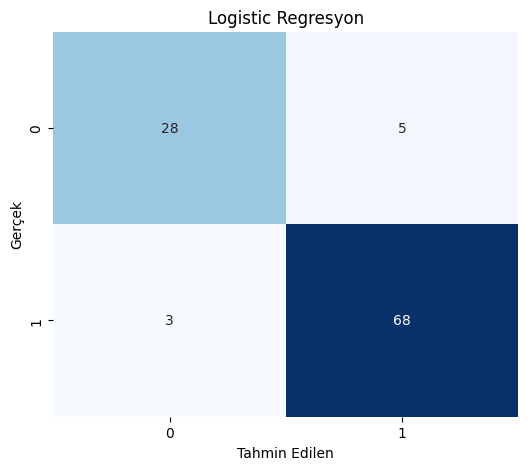

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Heatmap çizelim
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Logistic Regresyon')
plt.show()


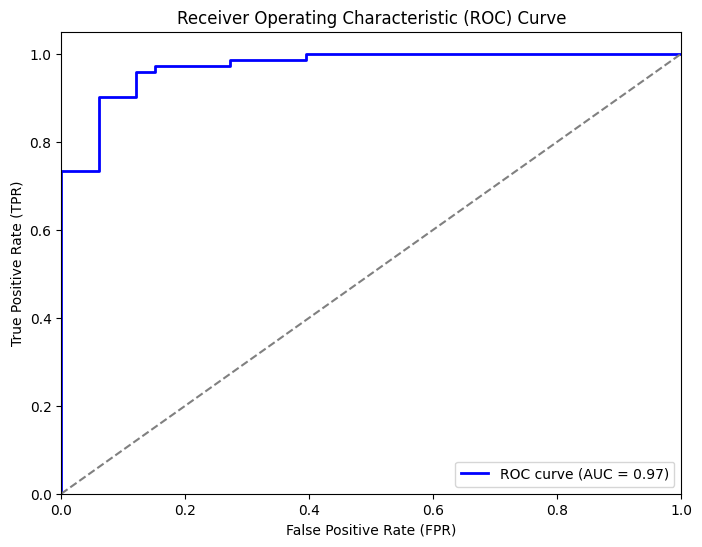

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Modelin tahminlerini alıyoruz
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Eğer model predict_proba kullanıyorsa

# FPR ve TPR'yi hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# AUC'yi hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model için diagonal çizgi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Modelimizde Overfiting overleraning olup olmadigini kontrollarini yapalim

In [ ]:
#Eğer Eğitim > Test farkı çok fazlaysa → Overfitting olabilir.
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Eğitim Doğruluğu:", train_acc)
print("Test Doğruluğu:", test_acc)
# deger yaklasik ayni o yuzden Overfiting yok

Eğitim Doğruluğu: 0.9230769230769231
Test Doğruluğu: 0.9230769230769231


# Cross-Validation (Çapraz Doğrulama)
Farklı veri dilimlerinde model kararlı çalışıyor mu görmek için yapılır. (İstersen ekleyebiliriz)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Modeli tanımla
model_cv = LogisticRegression(max_iter=1000)

# 5-Fold Cross-Validation ile doğruluk hesapla
scores = cross_val_score(model_cv, X, y, cv=5, scoring='accuracy')

# Sonuçları yazdır
print("Her fold için doğruluk skorları:", scores)
print("Ortalama doğruluk:", scores.mean())
print("Standart sapma:", scores.std())


Her fold için doğruluk skorları: [0.89423077 0.93269231 0.875      0.97115385 0.95192308]
Ortalama doğruluk: 0.925
Standart sapma: 0.035667763444214226


In [ ]:
import pickle

# Eğitilmiş modeli bir dosyaya kaydet (örnek isim: diabetes_model.pkl)
with open("diabetes_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model başarıyla 'diabetes_model.pkl' olarak kaydedildi.")


Model başarıyla 'diabetes_model.pkl' olarak kaydedildi.


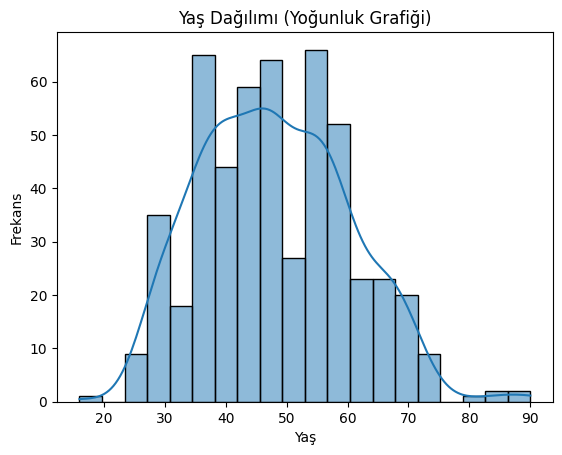

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yaş sütununun yoğunluk grafiği
sns.histplot(df["Age"], kde=True, bins=20)  # 'Age' sütun adın buysa
plt.title("Yaş Dağılımı (Yoğunluk Grafiği)")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()
